<a href="https://colab.research.google.com/github/sakanabil/Machine-Learning_25/blob/main/Saka_Nabil_JS04_SOAL_KUIS1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pengantar

Pada Kuis 1 ini Anda diminta untuk melakukan proses explorartory data analysis (EDA) dan pra pengolahan data pada dataset "Census Income". Dataset ini merupakan data tabular yang memiliki beberapa nilai yang hilang (missing value) dan nama variabel (fitur) yang perlu disesuaikan.

Untuk membantu Anda, notebook ini akan memberikan kode awal untuk proses download data, load data, dan inspeksi informasi terkait dengan metadata.

# Load Data and Inspect Metadata

In [ ]:
# Install UCI REPO Library
!pip install -q ucimlrepo

In [ ]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [ ]:
# fetch data
adult_income = fetch_ucirepo(id=2)

In [ ]:
# Data
X = adult_income.data.features
y = adult_income.data.targets

# Concate Features and Target
df = pd.concat([X, y], axis=1)

# Show Top 5
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
# Data Size
df.shape

(48842, 15)

In [ ]:
# Inspect metadata
adult_income.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

# Bagian 1 - Data Loading dan Data Imputation

## Soal 1 (5 poin)
1.   Lakukan inspeksi profile data
2.   **Variabel apa** yang memiliki **nilai yang hilang** (missing value) dan **berapa** jumlahnya?



In [ ]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


,0
age,0
workclass,963
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,966
relationship,0
race,0
sex,0


## Soal 2 (5 poin)
1. Lakukan proses data imputation pada fitur yang memiliki data yang hilang
2. Cek kembali apakah masih terdapat data yang hilang

In [ ]:
df['workclass'].fillna(value=df['workclass'].mode, inplace=True)
df['occupation'].fillna(value=df['occupation'].mode, inplace=True)
df['native-country'].fillna(value=df['native-country'].mode, inplace=True)

df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


## Soal 3 (10 poin)
Inspeksi semua fitur kualitatif. Jika terdapat value yang **tidak sesuai**, **ganti dengan 'Others'** atau yang sesuai atau jika terdapat duplikasi karena **kesalahan penulisan**, lakukan penyesuaian.

In [ ]:
kualitatif=df.select_dtypes(include=['object']).columns
print("Fitur kualitatif: ",kualitatif)

df=df.fillna('Others')

df['workclass']=df['workclass'].str.strip().str.title()
df['workclass']=df['workclass'].replace(['?','','Unknown','NaN','nan'], 'Others')

df['education']=df['education'].str.strip().str.title()
df['education']=df['education'].replace(['?','','Unknown','NaN'], 'Others')

df['marital-status']=df['marital-status'].str.strip().str.title()
df['marital-status']=df['marital-status'].replace(['?','','Unknown','NaN'], 'Others')

df['occupation']=df['occupation'].str.strip().str.title()
df['occupation']=df['occupation'].replace(['?','','Unknown','NaN'], 'Others')

df['relationship']=df['relationship'].str.strip().str.title()
df['relationship']=df['relationship'].replace(['?','','Unknown','NaN'], 'Others')

df['race']=df['race'].str.strip().str.title()
df['race']=df['race'].replace(['?','','Unknown','NaN'], 'Others')

df['sex']=df['sex'].str.strip().str.title()
df['sex']=df['sex'].replace(['?','','Unknown','NaN'], 'Others')

df['native-country']=df['native-country'].str.strip().str.title()
df['native-country']=df['native-country'].replace(['?','','Unknown','NaN'], 'Others')

df['income']=df['income'].str.strip().str.title()
df['income']=df['income'].replace({'<=50K.':'<=50K', '>50K.':'>50K'})

print(df['workclass'].unique())
print(df['education'].unique())
print(df['marital-status'].unique())
print(df['occupation'].unique())
print(df['relationship'].unique())
print(df['race'].unique())
print(df['sex'].unique())
print(df['native-country'].unique())
print(df['income'].unique())


Fitur kualitatif:  Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')
['State-Gov' 'Self-Emp-Not-Inc' 'Private' 'Federal-Gov' 'Local-Gov'
 'Others' 'Self-Emp-Inc' 'Without-Pay' 'Never-Worked']
['Bachelors' 'Hs-Grad' '11Th' 'Masters' '9Th' 'Some-College' 'Assoc-Acdm'
 'Assoc-Voc' '7Th-8Th' 'Doctorate' 'Prof-School' '5Th-6Th' '10Th'
 '1St-4Th' 'Preschool' '12Th']
['Never-Married' 'Married-Civ-Spouse' 'Divorced' 'Married-Spouse-Absent'
 'Separated' 'Married-Af-Spouse' 'Widowed']
['Adm-Clerical' 'Exec-Managerial' 'Handlers-Cleaners' 'Prof-Specialty'
 'Other-Service' 'Sales' 'Craft-Repair' 'Transport-Moving'
 'Farming-Fishing' 'Machine-Op-Inspct' 'Tech-Support' 'Others'
 'Protective-Serv' 'Armed-Forces' 'Priv-House-Serv']
['Not-In-Family' 'Husband' 'Wife' 'Own-Child' 'Unmarried' 'Other-Relative']
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
['Male' 'Female']
['United

# Bagian 2 - Visual Inspection



## Soal 1 - Visualisasi Data (20 poin)
Lakukan inspeksi visual pada,
1. Pada kolom 'age' dengan menggunakan histrogram
2. Pada kolom 'education' education menggunakan barchart
3. Pada kolom 'income' terhadap 'hours_per_week' menggunakan boxplot (kelompokkan berdasarkan kelompok income)
4. Pada kolom 'age' terhadap 'capital-gain' dan 'capital-loss' dengan lineplot (1 lineplot 2 data)

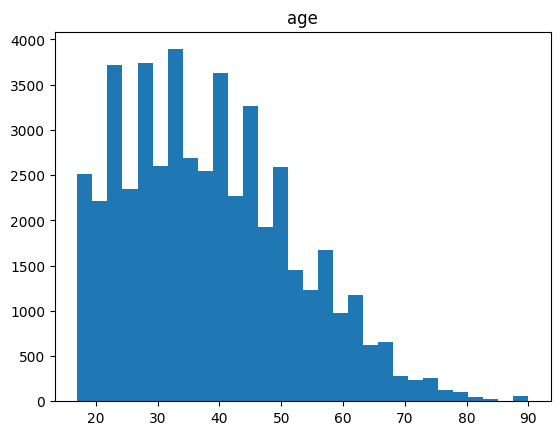

In [ ]:
# Jawab 1.1 - Histrogram
num_cols = ['age']
for col in num_cols:
  plt.figure()
  plt.hist(df[col], bins=30)
  plt.title(col)
  plt.show()

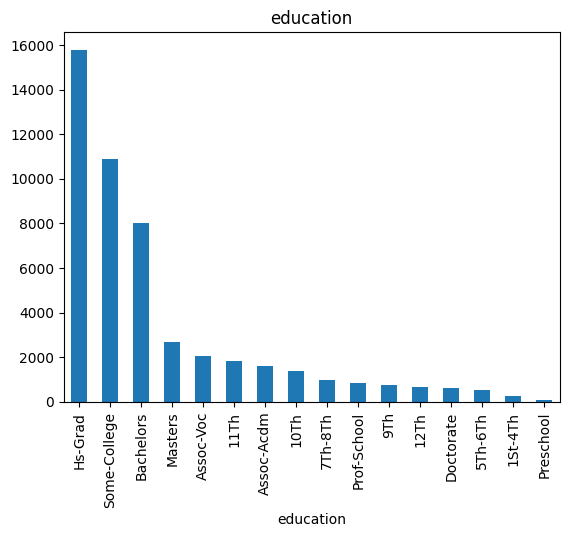

In [ ]:
# Jawab 1.2 - Barchart
num_cols = ['education']
for col in num_cols:
  plt.figure()
  df[col].value_counts().plot(kind='bar')
  plt.title(col)
  plt.show()

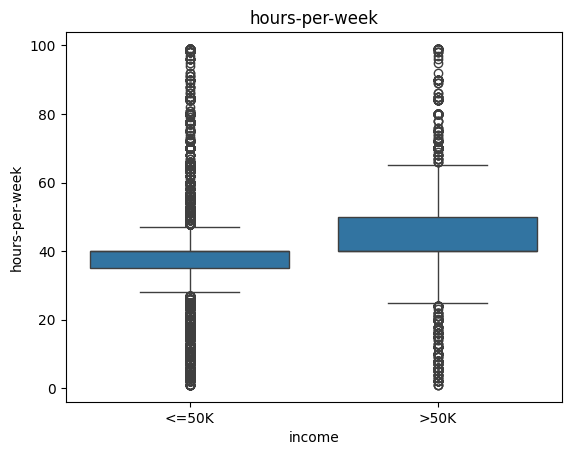

In [ ]:
# Jawab 1.3 - Boxplot
num_cols = ['hours-per-week']
for col in num_cols:
  plt.figure()
  sns.boxplot(x='income', y=col, data=df)
  plt.title(col)
  plt.show()

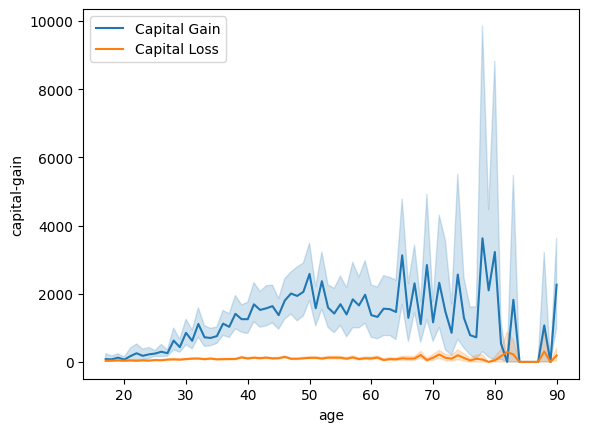

In [ ]:
# Jawab 1.4 - Line Chart
sns.lineplot(x='age', y='capital-gain', data=df, label="Capital Gain")
sns.lineplot(x='age', y='capital-loss', data=df, label="Capital Loss")
plt.legend()
plt.show()

## Soal 2 - Analisis Visual (15 poin)
1. Fenomena apa yang terjadi pada distribusi data 'age'?
2. Jika terdapat data yang hilang pada variabel 'age', strategi apa yang Anda terapkan? Mengapa?
3. Berapa jumlah outlier pada setiap kategori 'income' berkaitan dengan 'hour-per-week'? Kategori apa yang paling banyak memiliki outlier?

In [ ]:
# Jawab dengan komentar python

'''
Soal 2.1

Distribusi 'age' terlihat skewed ke kanan,
berarti kebanyakan memiliki umur di antara 20-50 tahun.
'''

'''
Soal 2.2

Jika ada data hilang pada 'age', saya akan imputasi
menggunakan median karena distribusinya skewed ke kanan.
'''

'''
Soal 2.3

Outlier pada kategori '>50K' : 781.
Outlier pada kategori '<=50K' : 11706.

Jadi kategori yang paling banyak memiliki outlier adalah kategori '<=50K'.
'''
outlier_count = {}
for income in df['income'].unique():
  subset = df[df['income'] == income]['hours-per-week']
  q1 = subset.quantile(0.25)
  q3 = subset.quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  outlier_count[income] = len(subset[(subset < lower_bound) | (subset > upper_bound)])
  print(f"Jumlah outlier pada kategori '{income}': {outlier_count[income]}")


Jumlah outlier pada kategori '<=50K': 11706
Jumlah outlier pada kategori '>50K': 781


# Bagian 3 - Encoding Variabel Kategorical

## Soal 1 (5 poin)
Lakukan encoding pada 'Sex' dan 'Income'. 'Income' merupakan variabel target

In [ ]:
# Jawab Soal 1
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['income'] = le.fit_transform(df['income'])

print(df[['sex', 'income']].head())

   sex  income
0    1       0
1    1       0
2    1       0
3    1       0
4    0       0


# Bagian 4 - Analisis Korelasi

## Soal 1 (10 poin)
1. Lakukan analisis korelasi pada variabel 'age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', dan 'income' (yang sudah di-encoding)
2. Berdasarkan hasil korelasi, informasi apa yang dapat Anda interpretasikan?

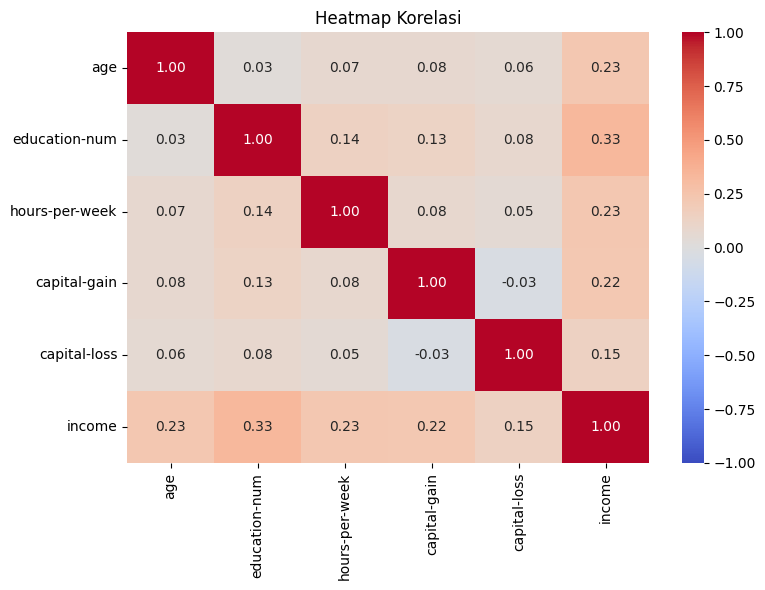

In [ ]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

cols = ['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', 'income']
corr = df[cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1, annot=True, fmt=".2f")
plt.title('Heatmap Korelasi')
plt.tight_layout()
plt.show()

In [ ]:
# Hasil analisis jelaskan pada cell ini
'''
Berdasarkan korelasi dengan income:

- Education-num (0.33) memiliki korelasi positif paling tinggi dengan income.
  Artinya semakin tinggi tingkat pendidikan, semakin besar peluang
  seseorang masuk kategori berpenghasilan tinggi.
- Age (0.23) dan Hours-per-week (0.23) memiliki korelasi positif.
  Orang yang lebih tua dan bekerja lebih banyak jam cenderung
  punya pendapatan lebih tinggi.
- Capital-gain (0.22) juga punya korelasi positif,
  orang dengan keuntungan modal cenderung masuk kategori pendapatan tinggi.
- Capital-loss (0.15) → korelasi paling rendah, artinya kerugian modal
  tidak terlalu berhubungan langsung dengan pendapatan.
'''


'\nBerdasarkan korelasi dengan income:\n\n- Education-num (0.33) memiliki korelasi positif paling tinggi dengan income.\n  Artinya semakin tinggi tingkat pendidikan, semakin besar peluang \n  seseorang masuk kategori berpenghasilan tinggi.\n- Age (0.23) dan Hours-per-week (0.23) memiliki korelasi positif.\n  Orang yang lebih tua dan bekerja lebih banyak jam cenderung \n  punya pendapatan lebih tinggi.\n- Capital-gain (0.22) juga punya korelasi positif, \n  orang dengan keuntungan modal cenderung masuk kategori pendapatan tinggi.\n- Capital-loss (0.15) → korelasi paling rendah, artinya kerugian modal \n  tidak terlalu berhubungan langsung dengan pendapatan.\n'

# Bagian 5 - Pra Pengolahan Data Pada Dataset MNIST

Pada bagian ini, Anda diminta untuk melakukan proses EDA dan pra pengolahan data sederhana pada dataset MNIST. Dataset MNIST merupakan data citra tulisan tangan untuk digil 0 hingga 9. Sebelum melakukan proses pengolahan, Anda akan dibantu dengan proses loading data dan inspeksi data.

Hints:
1. Hanya gunakan data **Test**
2. Anda perlu melakukan pengolahan terhadap semua data test (total 10k data). Anda dapat menggunakan function untuk mempermudah pekerjaan.

In [ ]:
# Fetch data and inspect data shape
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load train & test split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


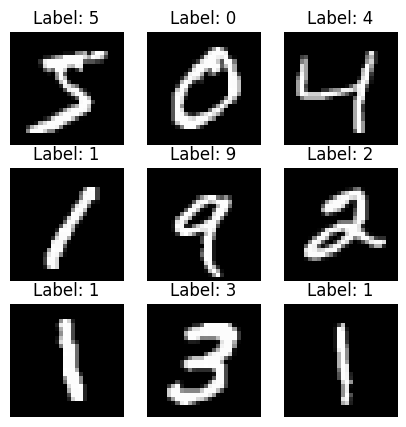

In [ ]:
# Inspeksi Visual
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

## Soal 1 (10 poin)
1. Lakukan proses **upsampling** citra menjadi ukuran 32x32
2. Tampilakan 5 data hasil proses **upsampling**

Hint: Anda harus membuat array kosong untuk menampung hasil upsampling. Replace pada array X_test tidak dapat dilakukan karena data disimpan dalam bentuk ndarray yang memiliki ukuran fix (10000, (28,28))

Original Test shape: (10000, 28, 28)
Resized Test shape: (10000, 32, 32)


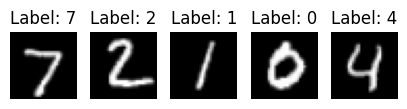

In [ ]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

import cv2

(_, _), (X_test, y_test) = mnist.load_data()

print("Original Test shape:", X_test.shape)

X_test_resized = np.zeros((X_test.shape[0], 32, 32))

for i in range(X_test.shape[0]):
  resized_img = cv2.resize(X_test[i], (32, 32))
  X_test_resized[i] = resized_img

print("Resized Test shape:", X_test_resized.shape)

plt.figure(figsize=(5,5))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_test_resized[i], cmap="gray")
    plt.axis("off")
    plt.title(f"Label: {y_test[i]}")
plt.show()

## Soal 2 (10 poin)
Lakukan normalisasi nilai citra tiap piksel menjadi rentang 0-1

Shape setelah di normalisasi: (10000, 32, 32)
Nilai min: 0.0
Nilai max: 1.0


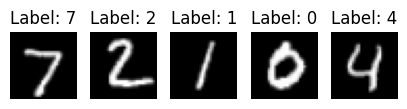

In [ ]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

X_test_normalized = X_test_resized / 255.0

print("Shape setelah di normalisasi:", X_test_normalized.shape)
print("Nilai min:", np.min(X_test_normalized))
print("Nilai max:", np.max(X_test_normalized))

plt.figure(figsize=(5,5))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_test_normalized[i], cmap="gray")
    plt.axis("off")
    plt.title(f"Label: {y_test[i]}")
plt.show()

## Soal 3 (10 poin)
Ubah metriks citra menjadi array 1 dimensi. Lakukan pada semua data test yang sudah di resize dan normalisasi.

Hint: Anda harus membuat holder array kosong untuk menampung hasilnya.

In [ ]:
# Jawab Soal 3
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

X_test_flattened = np.zeros((X_test_normalized.shape[0], 32*32))

for i in range(X_test_normalized.shape[0]):
  flattened_img = X_test_normalized[i].flatten()
  X_test_flattened[i] = flattened_img

print("Shape setelah di flatten:", X_test_flattened.shape)
print("Contoh array citra pertama (10 elemen awal): ")
print(X_test_flattened[0][:10])

Shape setelah di flatten: (10000, 1024)
Contoh array citra pertama (10 elemen awal): 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
